In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import display, Latex
from utils import *

import warnings
warnings.filterwarnings('ignore')

init_printing(use_latex='mathjax')

<h1><center>Brusselator model</center> </h1>

## Introduction

In this section, we will apply the result of the previous section on the Brusselator model. To speed up the calculation, we will use the _sympy_ library that provides the symbolic computation for Python. This way, we can derive the result quickly and fast.
In each cell, we might use some commands from _sympy_ (explained by a comment) or the following command:

__lprint__: Print a string into the ouput that has one or placeholders for latex scripts.

Below are some examples

In [3]:
lprint(lprint("The fraction is {0}={1}:", r"\lambda^*", r"\frac{B-1-A^2}{2}"))
lprint(r"$This \, is \, \pi \, in \,$ sympy: {0}", pi)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Brusselator PDEs

> The Brusselator PDEs for two species are
<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + A - (B+1)u + u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>

for diffusion constants $D_u$, $D_v$, and model parameters $A, B > 0$.
Therefore, the kinetic terms are

<h3><center>$f(u,v) = A - (B+1)u + u^2v$</center></h3>
<h3><center>$g(u,v) = Bu - u^2 v$</center></h3>

To start with __sympy__, we must define the list of parameters that will be used as symbol.

In [2]:
A, B, D_u, D_v, u, v, k = symbols('A, B, D_u, D_v, u, v, k', real=True)
#k = symbols('k', integer=True)

Next, we can define the kinetic terms, $f(u, v)$ and $g(u, v)$ for parameters $(D_u, D_v, A, B)$

In [3]:
# define kinteic terms symbolically in sympy
f = A - (B + 1) * u + u**2 * v
g = B * u - u**2 * v
# print their form
lprint("$f(u,v) = $ {0}", f)
lprint("$g(u,v) = $ {0}",g)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

and mixing them as a vector is using _Matrix_ method like

In [4]:
Kinetic = Matrix(
    [[f], 
     [g]])
lprint(r"$\boldsymbol{f}(u, v) = $ {0}", Kinetic)

<IPython.core.display.Latex object>

After that, we need to find the steady state solutions of the system without diffusion by solving the following nonlinear equations

<center>$f(u,v) = A - (B+1)u + u^2v = 0$</center>
<center>$g(u,v) = Bu - u^2 v = 0$</center>

The solution of the above equations, dented by $u^*$ and $v^*$, is such that
<center>$f(u^*, v^*) = 0$</center>
<center>$g(u^*, v^*) = 0$</center>

In _sympy_ it we can solve the system symbolicly by using the _solve_ function

In [5]:
# finding the steady state of the system, which
# is the solution of the system with respect to u and v
u_star, v_star = solve(Kinetic, (u, v))[0]
lprint("$u^* = $ {0}", u_star)
lprint("$v^* = $ {0}", v_star)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Next, to linearise the PDE system, we must derive the Jacobian of $(f, g)$ that is evaluated at $(u^*, v^*)$ 

In [6]:
# Find the jacobian of the vectorised kinetic terms w.r.t. u and v
J_0 = Kinetic.jacobian([u, v])
# Print the jacobian
lprint(r"$J_0= \frac{\partial \boldsymbol{f}_i}{\partial u_j} =$ {0} ", J_0)
# Evaluate the jacobian at the stationary solution
J_0 = J_0.subs([(u, u_star), (v, v_star)])
# print the jacobian at the stationary solution
lprint("$J_0|_{(u^*, v^*)} =$ {0}", J_0)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Eigenvalues of the resulting matrix in terms of parameters $A$ and $B$ derives by calling _eigenvals_ function

In [7]:
# Deriving eigenvalues of the jacobian in terms of parameter A and B
λ_0_1, λ_0_2 =  list(J_0.eigenvals().keys())
lprint("$\lambda^{(0)}_1 =$ {0}", λ_0_1)
lprint("$\lambda^{(0)}_2 =$ {0}", λ_0_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We can find the region of the $(A, B)$ plan where both $\lambda_1$ and $\lambda_2$ are negative (Turing stability) or directly use the inequalities we saw in the previous section.
Here, we try both of them and get exactly the same result.

In [8]:
# Find the trace and determinant of J_0 symbolically
cond_1 = J_0.trace()
cond_2 = J_0.det()
lprint(r"Condition 1: {0} $< 0$", cond_1)
lprint(r"Condition 2: {0} $> 0$", cond_2)
# convert the symbolic trace and determinants to numpy functions
cond_1_f = lambdify([A, B], cond_1, modules='numpy')
cond_2_f = lambdify([A, B], cond_2, modules='numpy')
# convert the symbolic lambda_2 to a numpy function
λ_0_2_f = lambdify([A, B], λ_0_2, modules='numpy')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

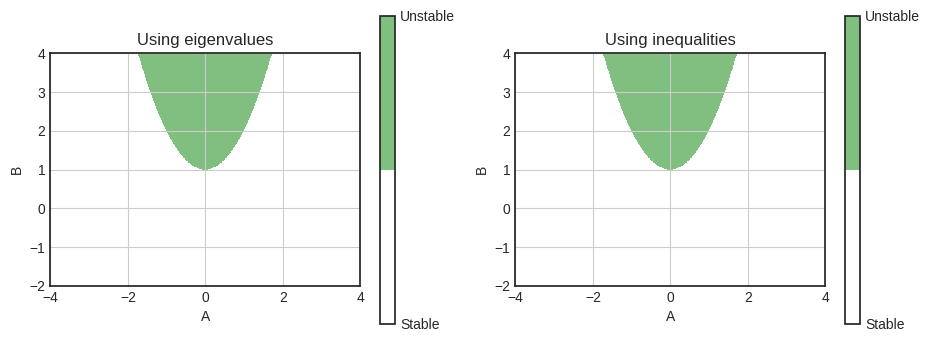

In [9]:
# Create a meshgrid [-4, 4]x[-2, 4] for (A, B) domain
L = 4
A_size = 400
B_size = 400
A_axis = L * np.linspace(-1, 1, A_size)
B_axis = L * np.linspace(-.5, 1, B_size)
A_grid, B_grid = np.meshgrid(A_axis, B_axis, sparse=False)
# Plotting
fig = plt.figure(figsize=(11,4))
plt.style.use('seaborn-white')
ax = fig.add_subplot(121)
ax.set_title("Using eigenvalues")

# Numerically calculate the largest eigenvalues
domain = λ_0_2_f( np.complex64(A_grid) , np.complex64(B_grid))
# plot the domain by using zero as the levelset
plot_two_levels(ax, np.real(domain), [-L, L, -L/2, L], "A", "B", 0, ['Stable', 'Unstable'])

ax = fig.add_subplot(122)
ax.set_title("Using inequalities")

# Numerically calculate the values of the condition one
domain = cond_1_f(A_grid , B_grid)
# plot the domain by using zero as the levelset
plot_two_levels(ax, domain, [-L, L, -L/2, L], "A", "B", 0, ['Stable', 'Unstable'])
#plt.tight_layout()
plt.show()

Including the diffusion, the matrix $\boldsymbol{J}$ defines as
<center>$\boldsymbol{J} = \boldsymbol{J_0} - k^2 \boldsymbol{D}$</center>
and we can use _sympy_ to find its egenvalues symbolically as follows:

In [10]:
# Define J 
J = J_0 - Matrix([[D_u*k**2, 0       ], 
                  [0,        D_v*k**2]])
# print its form
lprint(r"$\boldsymbol{J}$ = {0}", J)
# Find its eigenvalues
λ_1, λ_2 =  list(J.eigenvals().keys())
lprint("$\lambda_1 = $ {0}", λ_1)
lprint("$\lambda_2 = $ {0}", λ_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Find the critical wavenumber which is defined as
<center>$k_c =\sqrt{\frac{f_u }{2 D_u} + \frac{g_v}{2 D_v}}$</center>

In [11]:
f_u = J_0[0, 0]
f_v = J_0[0, 1]
g_u = J_0[1, 0]
g_v = J_0[1, 1]

lprint(r"$f_u$={0}", f_u)
lprint(r"$f_v$={0}", f_v)
lprint(r"$g_u$={0}", g_u)
lprint(r"$g_v$={0}", g_v)

k_c = sqrt(f_u/(2 * D_u) + g_v/(2 * D_v))

lprint(r"$k_c$={0}", k_c)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Before checking the validity of the critical wavenumber, let us find the bifurcation point for given values of $D_u = 1$, $D_v = 10$ and $B = 2$.

The onset of bifurcation finds by equation (36) and when it is an equality
<center>$(D_v f_u + D_u g_v)^2 \le 4D_u D_v (f_u g_v - f_v g_u)$<center>
 So, when we write this inequality for the Brusselator model, we have

In [12]:
bifurcation_con = simplify((D_v * f_u + D_u * g_v)**2 
                           - 4 * D_u *D_v * (f_u * g_v - f_v * g_u))
lprint("The onset of bifurcation condition: {0} = 0", bifurcation_con)

<IPython.core.display.Latex object>

And substituting $D_u = 1$, $D_v = 10$ and $B = 2$ leaves an equation for $A$ which we can solve

In [13]:
bifurcation_con = bifurcation_con.subs([(D_u, 1), (D_v, 10), (B, 2)])
lprint("The onset of bifurcation condition: {0} = 0", bifurcation_con)

<IPython.core.display.Latex object>

In [14]:
solutions = solve(bifurcation_con)
lprint("Solutions: {0}", solutions)
A_val = np.float64(solutions[0].evalf())
lprint("A={0}" f"={A_val:.4f}", solutions[0])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

So, $(D_u=1, D_v=10, A=-\sqrt{30 - 20 \sqrt{2}}, B=2)$ is the onset of bifurcation.
We plot $\lambda_2(k)$ against $k$ and $k_c$ as a vertical line

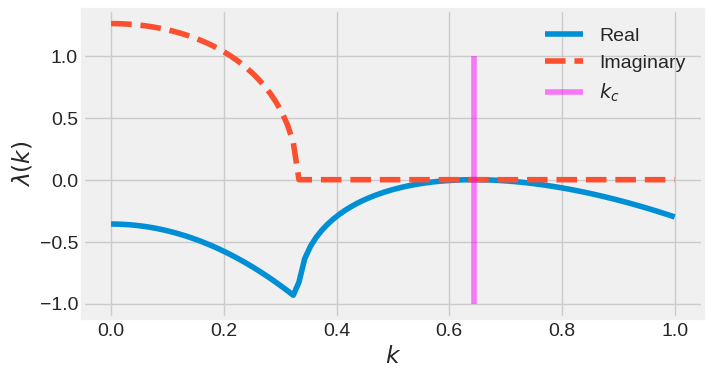

In [15]:
ks = np.complex64(np.linspace(0, 1, num=100))

λ_2_f = lambdify([k, A, B, D_u, D_v], λ_2, modules='numpy')
λ_2_graph = λ_2_f(ks, A =A_val, B = 2, D_u = 1, D_v = 10)


fig = plt.figure(figsize=(8,4))
plt.style.use('fivethirtyeight')
plt.plot(ks,np.real(λ_2_graph), label='Real')
plt.plot(ks,np.imag( λ_2_graph),  '--', label='Imaginary')

k_c_f = lambdify([A, B, D_u, D_v], k_c, modules='numpy')
k_critical = k_c_f(A = A_val, B = 2, D_u = 1, D_v = 10)
plt.vlines(k_critical, -1 , 1, color='magenta', linestyle='-', alpha=.5,
           label=r"$k_c$")
plt.xlabel(r"$k$")
plt.ylabel(r"$\lambda(k)$")
plt.legend()
plt.show()

is is important to note that the $k_c$ relation becomes invalid when we move the parameters from the onset of bifurcation. e.g. we add 0.2 to the calculated $A$ and see the $k_c$ is not accurate anymore

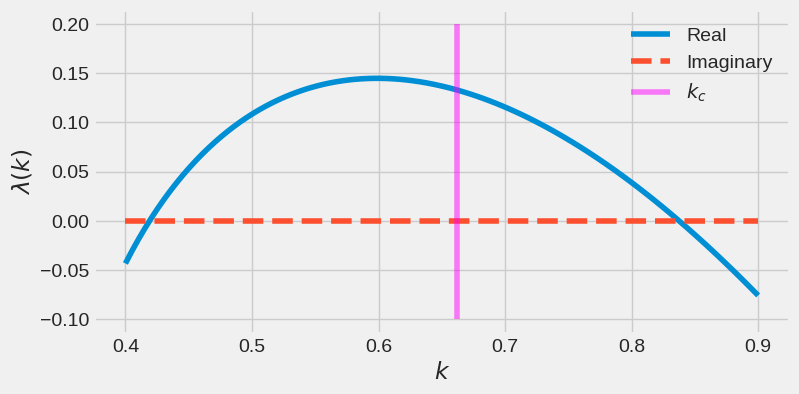

In [16]:
ks = np.complex64(np.linspace(0.4, .9, num=100))

λ_2_f = lambdify([k, A, B, D_u, D_v], λ_2, modules='numpy')
λ_2_graph = λ_2_f(ks, A =A_val+0.2, B = 2, D_u = 1, D_v = 10)


fig = plt.figure(figsize=(8,4))
plt.style.use('fivethirtyeight')
plt.plot(ks,np.real(λ_2_graph), label='Real')
plt.plot(ks,np.imag( λ_2_graph),  '--', label='Imaginary')

k_c_f = lambdify([A, B, D_u, D_v], k_c, modules='numpy')
k_critical = k_c_f(A = A_val+0.2, B = 2, D_u = 1, D_v = 10)
plt.vlines(k_critical, -.1 , .2, color='magenta', linestyle='-', alpha=.5,
           label=r"$k_c$")
plt.xlabel(r"$k$")
plt.ylabel(r"$\lambda(k)$")
plt.legend()
plt.show()

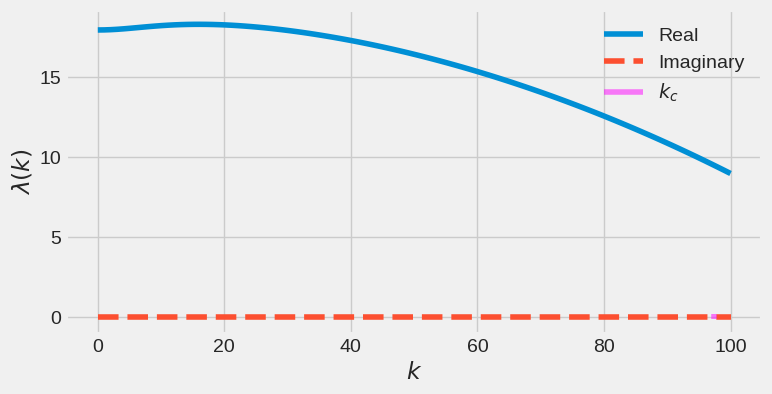

In [17]:
ks = np.complex64(np.linspace(0.0, 100, num=100))

λ_2_f = lambdify([k, A, B, D_u, D_v], λ_2, modules='numpy')
λ_2_graph = λ_2_f(ks, A =1, B = 20, D_u = 0.001, D_v = 0.1)


fig = plt.figure(figsize=(8,4))
plt.style.use('fivethirtyeight')
plt.plot(ks,np.real(λ_2_graph), label='Real')
plt.plot(ks,np.imag( λ_2_graph),  '--', label='Imaginary')

k_c_f = lambdify([A, B, D_u, D_v], k_c, modules='numpy')
k_critical = k_c_f(A = 1, B = 20, D_u = 0.001, D_v = 0.1)
plt.vlines(k_critical, -.1 , .2, color='magenta', linestyle='-', alpha=.5,
           label=r"$k_c$")
plt.xlabel(r"$k$")
plt.ylabel(r"$\lambda(k)$")
plt.legend()
plt.show()

In [18]:
ks[np.nonzero( λ_2_graph == np.max(λ_2_graph))[0][0]]

(16.161615+0j)

### combining all the conditions together

Previously, we saw that for the Brusselator model
<h4><center>$det(\boldsymbol{J_0}) = f_u g_v - f_v g_u = -A^2 < 0$</center></h4>

is always true. So, it remains three inequalities that together determine the Turing space of parameters:

<h3><center>$f_u + g_v < 0$,</center></h3>
<h4><center>$ D_v f_u + D_u g_v > 0$,</center></h4>
<h4><center>$(D_v f_u + D_u g_v)^2 > 4D_u D_v (f_u g_v - f_v g_u)$,</center></h4>

However, these inequalites depends on four parameters, namely $A, B, D_u, D_v$, which makes the plotting of the Turning space very hard. So, we introduce the ratio of diffusion constants as $\delta = D_u/D_v$, and then for $D_u, D_v > 0$
<h4><center>$f_u + g_v < 0$,</center></h4>
<h4><center>$ f_u + \delta g_v > 0$,</center></h4>
<h4><center>$(f_u + \delta g_v)^2 > 4 \delta (f_u g_v - f_v g_u)$,</center></h4>

This set of inequalities have only three independnet parameters, and by fixing $\delta$, we can find the Turing space on $(A, B)$ plane.

Let us first define $\delta$ and the new two inequalities symbolicly, and turn them to a numpy function.

In [19]:
δ = symbols("δ", positive=True)

cond_3 = f_u + δ * g_v
cond_4 = cond_3**2 - 4 * δ * J_0.det()
lprint(r"Condition 3: {0}$ > 0$ ", cond_3)
lprint(r"Condition 4: {0}$ > 0$ ", cond_4)
# convert the conditions to numpy functions
cond_3_f = lambdify([A, B, δ], cond_3, modules='numpy')
cond_4_f = lambdify([A, B, δ], cond_4, modules='numpy')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Using the function of all three conditions (inequalities), the following code iterates on a list of $\delta \in \{.5, .3, .2, .1, .05, 0.001\}$ for $(A, B) \in [-4, 4]x[-2, 4]$ plane, and then calculate the three conditions for each $(\delta, A, B)$. Note that the results are True/False values that a __bitwise AND__ operation on all of them is True, whenever all are satisfied and True. Finally, the intersected domain (base on __bitwise AND__ operation) is plotted for the given $\delta$.

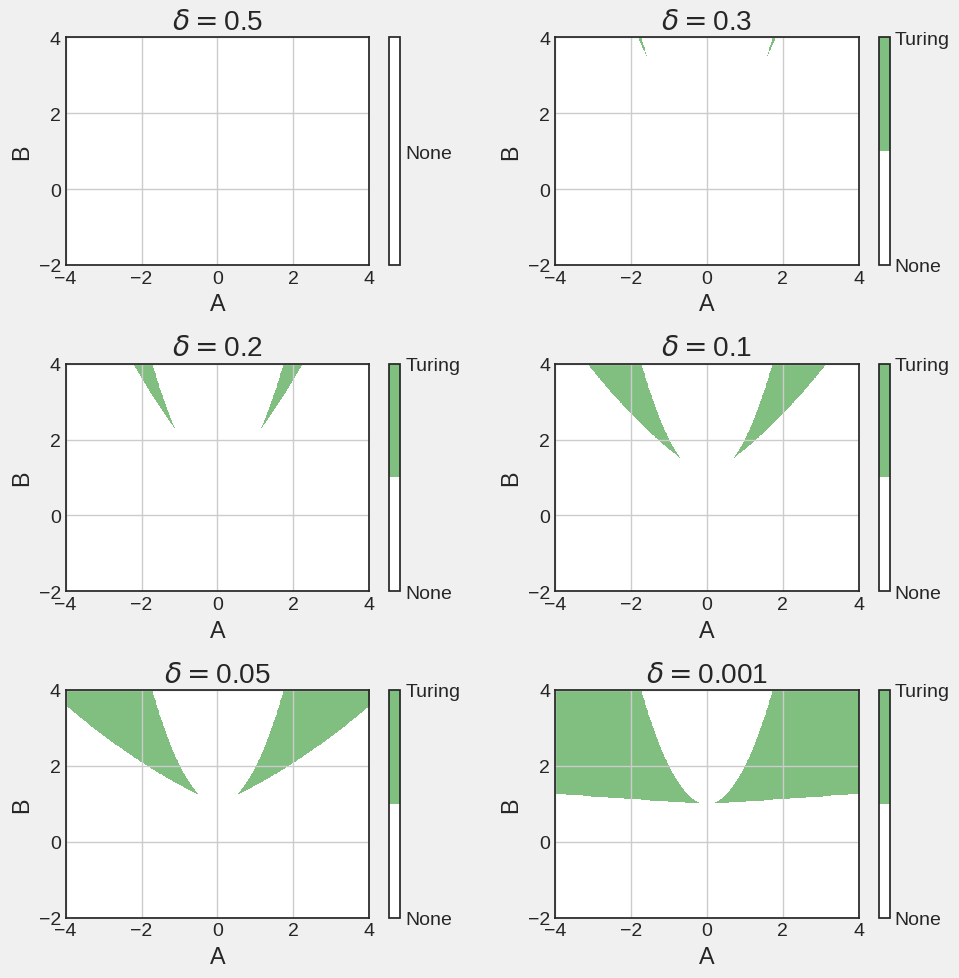

In [20]:
# Create a meshgrid [-4, 4]x[-2, 4] for (A, B) domain
L = 4
A_size = 400
B_size = 400
A_axis = L * np.linspace(-1, 1, A_size)
B_axis = L * np.linspace(-.5, 1, B_size)
A_grid, B_grid = np.meshgrid(A_axis, B_axis, sparse=False)

δ_values = np.array([.5, .3, .2, .1, .05, 0.001])
# Plotting
fig = plt.figure(figsize=(10,10))
plt.style.use('seaborn-white')

for i, δ_val in enumerate(δ_values):
    ax = fig.add_subplot(3, 2, i+1)
    ax.set_title(r"$\delta=$" f"{δ_val}")
    # Numerically calculate the values of the conditions
    domain = cond_3_f(A_grid , B_grid, δ_val)
    domain[domain > 0] = True
    domain[domain <= 0] = False
    # 
    domain2 = cond_4_f(A_grid , B_grid, δ_val)
    domain2[domain2 > 0] = True
    domain2[domain2 <= 0] = False
    #        
    domain_intersect = np.bool8(domain) & np.bool8(domain2)
    #
    domain3 = cond_1_f(A_grid , B_grid)    
    domain3[domain3 >= 0] = False
    domain3[domain3 < 0] = True
    domain_intersect = domain_intersect & np.bool8(domain3)
    # plot the domain by using zero as the levelset
    plot_two_levels(ax, np.float16(domain_intersect), 
                    [-L, L, -L/2, L], 
                    "A", "B", 
                    0, 
                    ['None', 'Turing'])

plt.tight_layout()
plt.show()

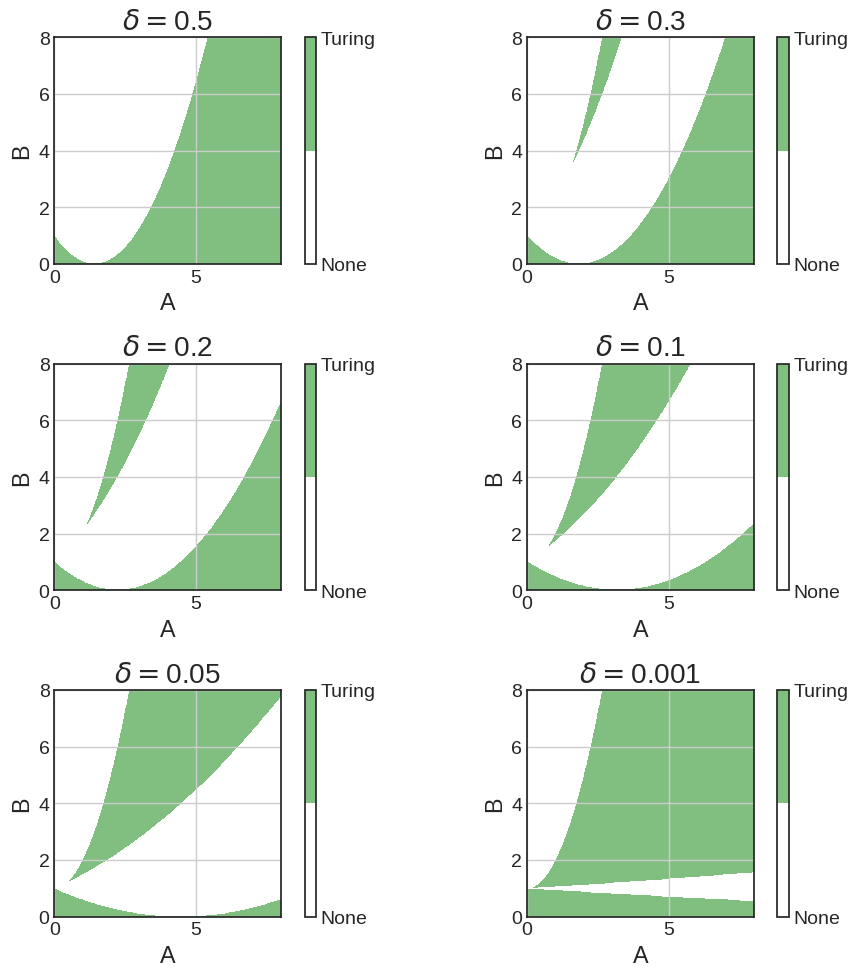

In [27]:
# Create a meshgrid [-4, 4]x[-2, 4] for (A, B) domain
L = 8
A_size = 400
B_size = 400
A_axis = L * np.linspace(0, 1, A_size)
B_axis = L * np.linspace(0, 1, B_size)
A_grid, B_grid = np.meshgrid(A_axis, B_axis, sparse=False)

δ_values = np.array([.5, .3, .2, .1, .05, 0.001])
# Plotting
fig = plt.figure(figsize=(10,10))
plt.style.use('seaborn-white')

for i, δ_val in enumerate(δ_values):
    ax = fig.add_subplot(3, 2, i+1)
    ax.set_title(r"$\delta=$" f"{δ_val}")
    # Numerically calculate the values of the conditions
    domain = cond_3_f(A_grid , B_grid, δ_val)
    domain[domain > 0] = True
    domain[domain <= 0] = False
    # 
    domain2 = cond_4_f(A_grid , B_grid, δ_val)
    domain2[domain2 > 0] = True
    domain2[domain2 <= 0] = False
    #        
    domain_intersect = np.bool8(domain2)
    #domain_intersect = np.bool8(domain) & np.bool8(domain2)
    #
    domain3 = cond_1_f(A_grid , B_grid)    
    domain3[domain3 >= 0] = False
    domain3[domain3 < 0] = True
    domain_intersect = domain_intersect & np.bool8(domain3)
    # plot the domain by using zero as the levelset
    plot_two_levels(ax, np.float16(domain_intersect), 
                    [0, L, 0, L], 
                    "A", "B", 
                    0, 
                    ['None', 'Turing'])

plt.tight_layout()
plt.show()

In [136]:
cond_4_f(1.0 , solve(cond_4.subs(A, 1).subs(δ, .01))[0]-.1, 0.01)

0.0500000000000000

In [130]:
cond_3_f(1.0 , solve(cond_4.subs(A, 1).subs(δ, .01))[1], 0.01)

0.200000000000000

In [127]:
solve(cond_4.subs(A, 1).subs(δ, .01))

[0.81, 1.21]

# Finding the Turing space for diffusion constants that are different for around 10%

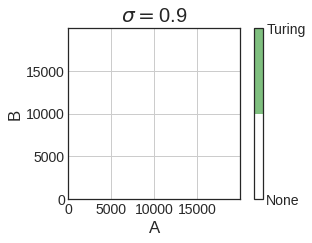

In [34]:
# Create a meshgrid [-4, 4]x[-2, 4] for (A, B) domain
L_1 = 400
L_2 = 400
A_size = 20000
B_size = 20000
A_axis = L_1 * np.linspace(0, 1, A_size)
B_axis = L_2 * np.linspace(0, 1, B_size)
A_grid, B_grid = np.meshgrid(A_axis, B_axis, sparse=False)

δ_values = np.array([.9])
# Plotting
fig = plt.figure(figsize=(10,10))
plt.style.use('seaborn-white')

for i, δ_val in enumerate(δ_values):
    ax = fig.add_subplot(3, 2, i+1)
    ax.set_title(r"$\sigma=$" f"{δ_val}")
    # Numerically calculate the values of the conditions
    domain = cond_3_f(A_grid , B_grid, δ_val)
    domain[domain > 0] = True
    domain[domain <= 0] = False
    # 
    domain2 = cond_4_f(A_grid , B_grid, δ_val)
    domain2[domain2 > 0] = True
    domain2[domain2 <= 0] = False
    #        
    domain_intersect = np.bool8(domain) & np.bool8(domain2)
    #
    domain3 = cond_1_f(A_grid , B_grid)    
    domain3[domain3 >= 0] = False
    domain3[domain3 < 0] = True
    domain_intersect = domain_intersect & np.bool8(domain3)
    # plot the domain by using zero as the levelset
    plot_two_levels(ax, np.float16(domain_intersect), 
                    None,#[0, L_1, 0, L_2], 
                    "A", "B", 
                    0, 
                    ['None', 'Turing'])
    #


#plt.tight_layout()
plt.show()

In [54]:
i,j = np.nonzero(domain_intersect)
index = -1
print("B=", A_axis[i[index]])
print("A=", B_axis[j[index]])

B= 400.0
A= 20.021001050052504


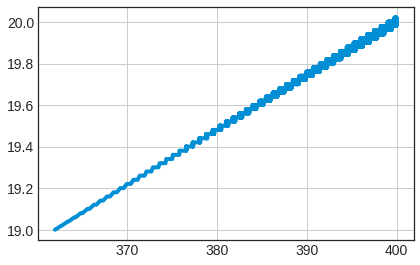

In [44]:
plt.plot(A_axis[i], B_axis[j])
plt.grid()
plt.show()

In [73]:
r"${0} < 0 \implies$ " f"{cond_1_f(20, 400)} < 0"

'${0} < 0 \\implies$ -1 < 0'

In [77]:
lprint("{0} < 0", cond_1)
lprint("{0} > 0", cond_2)
lprint("{0} > 0", cond_3)
lprint("{0} > 0", cond_4)
lprint("For $A = 20$, $A = 400$ and $\delta = 0.9$")
lprint(r"{0} < 0 $\implies$ " f"{cond_1_f(20, 400)} < 0", cond_1)
lprint(r"{0} > 0 $\implies$ " f"{cond_2_f(20, 400)} > 0", cond_2)
lprint(r"{0} > 0 $\implies$ " f"{cond_3_f(20, 400, 0.9)} > 0", cond_3)
lprint(r"{0} > 0 $\implies$ " f"{cond_4_f(20, 400, 0.9)} > 0", cond_4)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Before including diffusion
<h4><center>$(f_u - g_v)^2 + 4 f_v g_u <  0$,</center></h4>

In [55]:
cond_5 = (f_u - g_v)**2 + 4 * f_v * g_u
cond_5_f = lambdify([A, B], cond_5, modules='numpy')

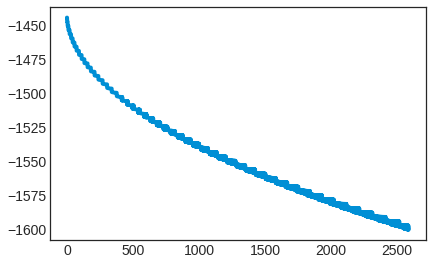

In [60]:
plt.plot(cond_5_f(B_axis[j], A_axis[i]))

# Dispersion relation for $A = 20, B = 400, \delta = 0.9$

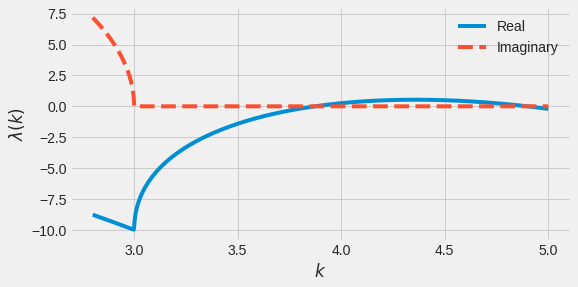

In [67]:
ks = np.complex64(np.linspace(2.8, 5, num=1000))

λ_2_graph = λ_2_f(ks, A =20, B = 400, D_u = 1, D_v = 10/9)


fig = plt.figure(figsize=(8,4))
plt.style.use('fivethirtyeight')
plt.plot(ks,np.real(λ_2_graph), label='Real')
plt.plot(ks,np.imag( λ_2_graph),  '--', label='Imaginary')

plt.xlabel(r"$k$")
plt.ylabel(r"$\lambda(k)$")
plt.legend()
plt.show()

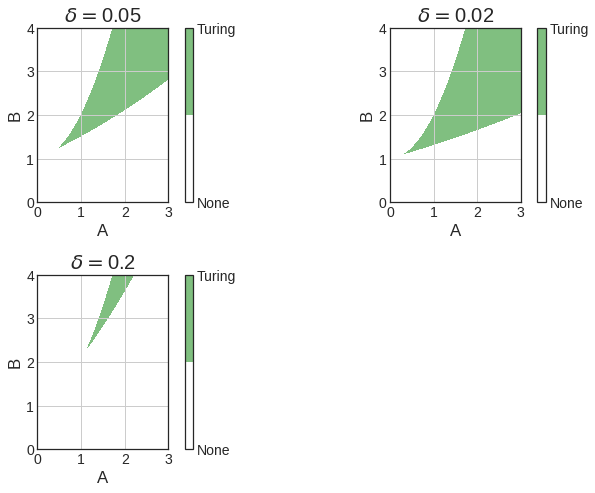

In [28]:
# Create a meshgrid [-4, 4]x[-2, 4] for (A, B) domain
L_A = 3
L_B = 4
A_size = 800
B_size = 800
A_axis = L_A * np.linspace(0, 1, A_size)
B_axis = L_B * np.linspace(0, 1, B_size)
A_grid, B_grid = np.meshgrid(A_axis, B_axis, sparse=False)

δ_values = np.array([0.002/0.04, 0.001/0.05, 0.002/0.01])
# Plotting
fig = plt.figure(figsize=(10,10))
plt.style.use('seaborn-white')

for i, δ_val in enumerate(δ_values):
    ax = fig.add_subplot(3, 2, i+1)
    ax.set_title(r"$\delta=$" f"{δ_val}")
    # Numerically calculate the values of the conditions
    domain = cond_3_f(A_grid , B_grid, δ_val)
    domain[domain > 0] = True
    domain[domain <= 0] = False
    # 
    domain2 = cond_4_f(A_grid , B_grid, δ_val)
    domain2[domain2 > 0] = True
    domain2[domain2 <= 0] = False
    #        
    domain_intersect = np.bool8(domain) & np.bool8(domain2)
    #
    domain3 = cond_1_f(A_grid , B_grid)    
    domain3[domain3 >= 0] = False
    domain3[domain3 < 0] = True
    domain_intersect = domain_intersect & np.bool8(domain3)
    # plot the domain by using zero as the levelset
    plot_two_levels(ax, np.float16(domain_intersect), 
                    [0, L_A, 0, L_B], 
                    "A", "B", 
                    0, 
                    ['None', 'Turing'])

plt.tight_layout()
plt.show()